### 데이터 일차 가공 및 모델 학습/예측/평가

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
card_df = pd.read_csv('creditcard.csv')
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [3]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
from sklearn.model_selection import train_test_split

# 인자로 입력받은 DataFrame을 복사한 뒤 Time 칼럼만 삭제하고 박사된 DataFrame 반환
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수
def get_train_test_dataset(df=None):
    # 인자로 입력된 DataFrame의 사전 데이터 가공이 완료된 복사 DataFrame 반환
    df_copy = get_preprocessed_df(df)
    
    # DataFrame의 맨 마지막 칼럼이 레이블, 나머지는 피처들
    X = df_copy.iloc[:, :-1]
    y = df_copy.iloc[:, -1]
    
    # train_test_split()으로 학습과 테스트 데이터 분할, stratify=y_target으로 Stratifeid 기반 분할
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
    
    # 학습과 테스트 데이터 세트 반환
    return X_train, X_test, y_train, y_test

In [5]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [6]:
y_train.value_counts() / y_train.shape[0]*100

0    99.827451
1     0.172549
Name: Class, dtype: float64

In [7]:
y_test.value_counts() / y_test.shape[0]*100

0    99.826785
1     0.173215
Name: Class, dtype: float64

In [8]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve
# 3장에서 사용한 get_clf_eval() 함수를 이용해 평가 수행
def get_clf_eval(y_test, pred, pred_proba):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차행렬')
    print(confusion)
    print('정확도 : {:.4f}, 정밀도 : {:.4f}, 재현율 : {:.4f}, F1:{:.4f}, AUC:{:.4f}\n'.format(accuracy, precision, recall,f1, roc_auc))

In [10]:
get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차행렬
[[85280    15]
 [   62    86]]
정확도 : 0.9991, 정밀도 : 0.8515, 재현율 : 0.5811, F1:0.6908, AUC:0.9554



In [11]:
# 인자로 사이킷런의 Estimator 객체와 학습/테스트 데이터 세트를 입력 받아서 학습/예측/평가 수행.
def get_model_train_eval(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    pred_proba = model.predict_proba(X_test)[:, 1]
    get_clf_eval(y_test, pred, pred_proba)

In [12]:
get_model_train_eval(lr_clf,X_train, X_test, y_train, y_test)

오차행렬
[[85280    15]
 [   62    86]]
정확도 : 0.9991, 정밀도 : 0.8515, 재현율 : 0.5811, F1:0.6908, AUC:0.9554



In [13]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=1, boost_from_average=False)
get_model_train_eval(lgbm_clf, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

# boost_from_average True인 경우
# 오차행렬
# [[85133   162]
#  [  143     5]]
# 정확도 : 0.9964, 정밀도 : 0.0299, 재현율 : 0.0338, F1:0.0317, AUC:0.5156

오차행렬
[[85290     5]
 [   36   112]]
정확도 : 0.9995, 정밀도 : 0.9573, 재현율 : 0.7568, F1:0.8453, AUC:0.9790



## 데이터 분포도 변환 후 모델 학습/예측/평가

<AxesSubplot:xlabel='Amount', ylabel='Density'>

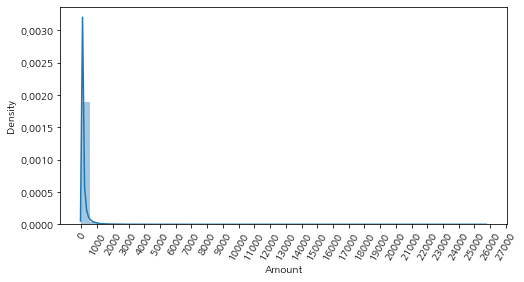

In [14]:
import seaborn as sns
plt.figure(figsize=(8,4))
plt.xticks(range(0,30000,1000), rotation=60)
sns.distplot(card_df['Amount'])

In [15]:
from  sklearn.preprocessing import StandardScaler

# 사이킷런의 StandardScaler를 이ㅛㅇ해 정규 본포 형태로 Amount 피처값 변환하는 로직으로 수정
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))
    
    # 변환된 Amount를 Amount_Scaled로 피처명 변경 후 DataFrame 맨 앞 칼럼으로 입력
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    
    # 기존 Time, Amount 피처 삭제
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    
    return df_copy

# 아래 두 함수는 이전에 생성한걸 보라고 가져온 것

def get_train_test_dataset(df=None):
    df_copy = get_preprocessed_df(df)
    X = df_copy.iloc[:, :-1]
    y = df_copy.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
    return X_train, X_test, y_train, y_test

def get_model_train_eval(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    pred_proba = model.predict_proba(X_test)[:, 1]
    get_clf_eval(y_test, pred, pred_proba)

In [16]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [17]:
# 로지스틱 회귀 예측 성능
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, X_train, X_test, y_train, y_test)

오차행렬
[[85281    14]
 [   58    90]]
정확도 : 0.9992, 정밀도 : 0.8654, 재현율 : 0.6081, F1:0.7143, AUC:0.9702



In [19]:
# LightGBM 예측 성능
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, X_train, X_test, y_train, y_test)

오차행렬
[[85290     5]
 [   37   111]]
정확도 : 0.9995, 정밀도 : 0.9569, 재현율 : 0.7500, F1:0.8409, AUC:0.9779



In [20]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    return df_copy

In [21]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)
get_model_train_eval(lr_clf, X_train, X_test, y_train, y_test)
get_model_train_eval(lgbm_clf, X_train, X_test, y_train, y_test)

오차행렬
[[85283    12]
 [   59    89]]
정확도 : 0.9992, 정밀도 : 0.8812, 재현율 : 0.6014, F1:0.7149, AUC:0.9727

오차행렬
[[85290     5]
 [   35   113]]
정확도 : 0.9995, 정밀도 : 0.9576, 재현율 : 0.7635, F1:0.8496, AUC:0.9796



## 이상치 데이터 제거 후 모델 학습/예측/평가

<AxesSubplot:>

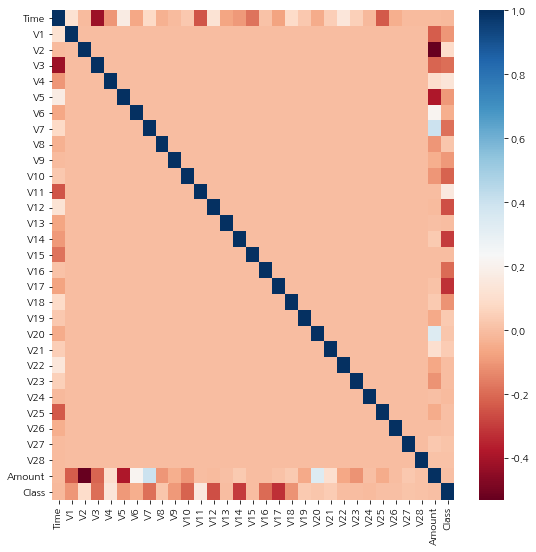

In [26]:
import seaborn as sns
plt.figure(figsize=(9,9))
corr = card_df.corr()
sns.heatmap(corr, cmap='RdBu')

In [27]:
import numpy as np

def get_outlier(df, column, weight=1.5):
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함
    fraud = df[ df['Class'] == 1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    
    # IQR을 구하고, IQR에 1.5를 곱해 최대 최소값 지점 구함
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    low = quantile_25 - iqr_weight
    high = quantile_75 + iqr_weight
    
    # 최대값보다 크거나, 최소값보다 작은 값을 이상치 데이터로 설정하고 DataFrame index로 반환
    outlier_index = fraud[ (fraud < low) | (fraud > high) ].index
    return outlier_index

In [34]:
get_outlier(card_df, 'V14')

Int64Index([8296, 8615, 9035, 9252], dtype='int64')

In [35]:
# def get_preprocessed_df()를 로그 변환 후 V14 피처의 이상치 데이터를 삭제하는 로직으로 변경
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    # 이상치 데이터 삭제하는 로직 추가
    outlier_index = get_outlier(card_df,'V14')
    df_copy.drop(outlier_index, axis=0, inplace=True)
    return df_copy

In [36]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, X_train, X_test, y_train, y_test)
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, X_train, X_test, y_train, y_test)

# 앞에꺼
# 오차행렬
# [[85283    12]
#  [   59    89]]
# 정확도 : 0.9992, 정밀도 : 0.8812, 재현율 : 0.6014, F1:0.7149, AUC:0.9727

# 오차행렬
# [[85290     5]
#  [   35   113]]
# 정확도 : 0.9995, 정밀도 : 0.9576, 재현율 : 0.7635, F1:0.8496, AUC:0.9796


오차행렬
[[85281    14]
 [   48    98]]
정확도 : 0.9993, 정밀도 : 0.8750, 재현율 : 0.6712, F1:0.7597, AUC:0.9743

오차행렬
[[85290     5]
 [   25   121]]
정확도 : 0.9996, 정밀도 : 0.9603, 재현율 : 0.8288, F1:0.8897, AUC:0.9780



## SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가

In [38]:
from imblearn.over_sampling import SMOTE

In [42]:
smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트 : ', X_train.shape, y_train.shape)

SMOTE 적용 전 학습용 피처/레이블 데이터 세트 :  (199362, 29) (199362,)


In [43]:
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트 : ', X_train_over.shape, y_train_over.shape)

SMOTE 적용 전 학습용 피처/레이블 데이터 세트 :  (398040, 29) (398040,)


In [48]:
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 후 레이블 값 분포: 
 0    199020
1    199020
Name: Class, dtype: int64


In [49]:
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, X_train_over, X_test, y_train_over, y_test)

# 오차행렬
# [[85281    14]
#  [   48    98]]
# 정확도 : 0.9993, 정밀도 : 0.8750, 재현율 : 0.6712, F1:0.7597, AUC:0.9743

오차행렬
[[82937  2358]
 [   11   135]]
정확도 : 0.9723, 정밀도 : 0.0542, 재현율 : 0.9247, F1:0.1023, AUC:0.9737



In [51]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, X_train_over, X_test, y_train_over, y_test)

# 오차행렬
# [[85290     5]
#  [   25   121]]
# 정확도 : 0.9996, 정밀도 : 0.9603, 재현율 : 0.8288, F1:0.8897, AUC:0.9780

오차행렬
[[85283    12]
 [   22   124]]
정확도 : 0.9996, 정밀도 : 0.9118, 재현율 : 0.8493, F1:0.8794, AUC:0.9814



In [52]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

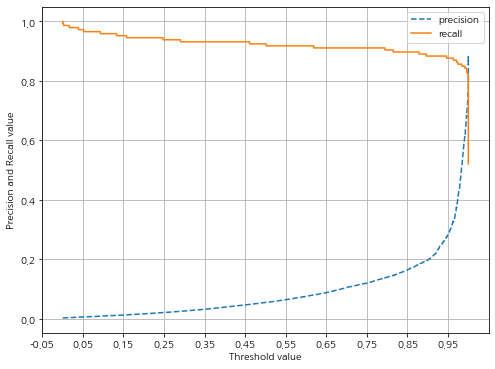

In [53]:
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1])